In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/Face mask detection/Face-Mask-Detection/dataset/with_mask/0_0_≈˙◊¢ 2020-02-23 132115.png")

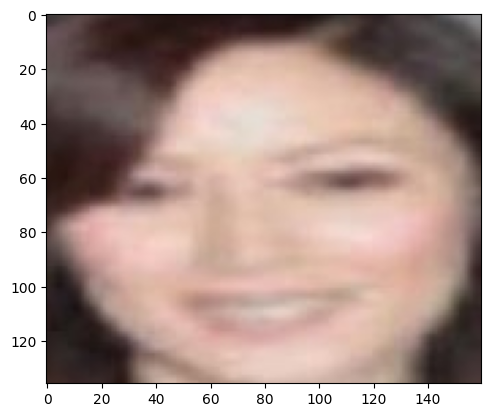

In [ ]:
dir = "/content/drive/MyDrive/Face mask detection/Face-Mask-Detection/dataset"

classes = ["with_mask","without_mask"]
for category in classes:
  path = os.path.join(dir, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)

    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))


In [ ]:
#converting all the images into array

In [ ]:
img_size = 224
training_data = []

def creat_tdata():
  for category in classes:
    path = os.path.join(dir, category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array,class_num])

      except Exception as e:
        pass


In [ ]:
creat_tdata()

In [ ]:
print(len(training_data))

3833


In [ ]:
#shuffling the dataset for better training of the deep learning model

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
data =[]
labels =[]

for features, label in training_data:
  data.append(features)
  labels.append(label)


data = np.array(data).reshape(-1, img_size ,img_size,3)


In [ ]:
labels = np.array(labels)

In [ ]:
# training the deep learning architecture

In [ ]:
import pickle

pickle_out = open("data.pickle" , "wb")
pickle.dump(data, pickle_out)
pickle_out.close()

pickle_out = open("labels.pickle", "wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("data.pickle" , "rb")
data = pickle.load(pickle_in)

pickle_in = open("labels.pickle", "rb")
labels = pickle.load(pickle_in)

In [ ]:
#creating deep learning model for training

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
#transfer learning tuning, weights of the last check points of the base model

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)


In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
#reduced the nuerons in the model and parameters
#as the last layers had around 1000+ parameters in each of them but now it has only one
#reduced the parameters by 1023975

In [ ]:
#setting the binary classification mask detection

In [ ]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(data,labels, epochs = 10, validation_split = 0.1)

Epoch 1/10
108/108 [==============================] - 33s 153ms/step - loss: 0.0850 - accuracy: 0.9716 - val_loss: 0.3112 - val_accuracy: 0.9453
Epoch 2/10
108/108 [==============================] - 15s 142ms/step - loss: 0.0351 - accuracy: 0.9899 - val_loss: 0.5995 - val_accuracy: 0.9219
Epoch 3/10
108/108 [==============================] - 16s 147ms/step - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0647 - val_accuracy: 0.9896
Epoch 4/10
108/108 [==============================] - 15s 141ms/step - loss: 0.0114 - accuracy: 0.9977 - val_loss: 0.0531 - val_accuracy: 0.9870
Epoch 5/10
108/108 [==============================] - 15s 141ms/step - loss: 0.0032 - accuracy: 0.9983 - val_loss: 0.0043 - val_accuracy: 0.9974
Epoch 6/10
108/108 [==============================] - 16s 144ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0232 - val_accuracy: 0.9948
Epoch 7/10
108/108 [==============================] - 15s 142ms/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 0.0173 - val_ac

In [ ]:
new_model.save('FMD_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model('FMD_model.h5')

In [ ]:
#checking the predictions of the model we built

In [ ]:
!pip install opencv-python-headless

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [1]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined


In [ ]:
frame = '/content/photo.jpg'

face is not detected
1/1 [==============================] - 0s 20ms/step


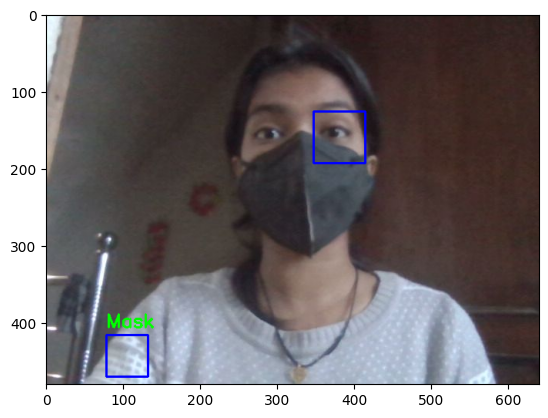

In [ ]:


img = cv2.imread(frame)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
haar = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
face = haar.detectMultiScale(gray,1.1,4)

for x, y, w, h in face:
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = img[y:y+h, x:x+w]
  cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
  face = haar.detectMultiScale(roi_gray)
  if len(face) == 0:
    print("face is not detected")
  else:
    for(ex, ey, ew, eh) in face:
      face_roi = roi_color[ey:ey+eh, ex:ex+ew]
      resized_img = cv2.resize(face_roi, (224,224))
      new_img = resized_img.reshape(-1,224,224,3)
      new_img = np.array(new_img)
      prediction = new_model.predict(new_img)
      if prediction[0][0] < 0.5:
        cv2.putText(img, "Mask", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
      else:
        cv2.putText(img, "No Mask", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
